<a href="https://colab.research.google.com/github/asabrems/women_in_Tech/blob/main/women_in_enginneering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive


/content/gdrive/MyDrive


In [4]:
#!unzip -q women_in_Tech.zip

In [5]:
import os
import numpy as np
import pandas as pd


import torch
import torchvision
import torchvision.transforms as transform
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from statistics import mean
cuda = torch.cuda.is_available()
cuda

False

#Data access

Accessing all the data files 

In [6]:
HR_numeric = pd.read_csv('./women_in_Tech/HackerRank-Developer-Survey-2018-Numeric.csv/HackerRank-Developer-Survey-2018-Numeric.csv')
HR_values = pd.read_csv('./women_in_Tech/HackerRank-Developer-Survey-2018-Values.csv/HackerRank-Developer-Survey-2018-Values.csv')
Country_code_mapping = pd.read_csv('./women_in_Tech/Country-Code-Mapping.csv')
HR_codebook = pd.read_csv('./women_in_Tech/HackerRank-Developer-Survey-2018-Codebook.csv')
HR_code_mapping = pd.read_csv('./women_in_Tech/HackerRank-Developer-Survey-2018-Numeric-Mapping.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10,19,137,138,250) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,10,19,137,138) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


For every string we have to change #NULL! to null or use the equivalent of their values 

In [7]:
print('the number of data',len(HR_numeric))
HR_numeric


the number of data 25090


,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,q0005_other,q6LearnCodeUni,q6LearnCodeSelfTaught,q6LearnCodeAccelTrain,q6LearnCodeDontKnowHowToYet,q6LearnCodeOther,q0006_other,q7Level1,q8JobLevel,q0008_other,q8Student,q9CurrentRole,q0009_other,q10Industry,q0010_other,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q12JobCritOther,q0012_other,...,q28LoveOCaml,q28LoveOther,q29FrameLoveAngularJS,q29FrameLoveReact,q29FrameLoveVuedotjs,q29FrameLoveEmber,q29FrameLoveBackboneDotjs,q29FrameLoveSpring,q29FrameLoveJSF,q29FrameLoveStruts,q29FrameLoveDjango,q29FrameLovePyramid,q29FrameLoveRubyonRails,q29FrameLovePadrino,q29FrameLoveASP,q29FrameLoveNetCore,q29FrameLoveNodeDotjs,q29FrameLoveExpressJS,q29FrameLoveMeteor,q29FrameLoveCocoa,q29FrameLoveReactNative,q29FrameLoveRubyMotion,q0029_other,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks,q30LearnCodeAcademicPaper,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,148.0,3,3,2,3,NaN,1,"statistics, computer science",1,1,0,0,0,NaN,1,1,NaN,1,18,NaN,0,student,0,0,0,1,1,0,0,0,0,0,0,0,1,0,NaN,...,2,I think there should be more answers for this ...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,Same here! I don?t know how to use above things,1,1,0,0,0,0,0,1,datacamp,1,1,NaN,2,NaN,#NULL!,NaN,2
1,6478031510,10/26/17 6:18,10/26/17 7:49,164.0,3,4,1,7,NaN,2,NaN,1,1,0,0,0,NaN,1,0,Test Automation Lead,0,10,NaN,5,NaN,1,1,1,1,1,0,0,1,0,1,0,0,1,#NULL!,NaN,...,0,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,1,1,0,0,1,0,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,2
2,6464392829,10/19/17 10:44,10/19/17 10:56,98.0,2,2,2,3,NaN,2,NaN,1,0,1,0,0,NaN,1,1,NaN,1,18,NaN,4,NaN,0,0,0,0,0,0,0,0,0,1,0,0,1,0,NaN,...,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,0,0,0,0,1,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,2
3,6481629912,10/27/17 1:51,10/27/17 2:05,43.0,2,2,1,5,NaN,1,NaN,0,1,0,0,0,NaN,1,1,NaN,1,18,NaN,0,student,0,0,1,0,0,1,0,0,0,1,0,0,0,0,NaN,...,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,0,0,0,0,0,0,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,3
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,3,4,2,5,NaN,0,Fine Arts & Computer Science,1,1,0,0,0,NaN,1,5,NaN,0,2,NaN,14,NaN,0,1,0,1,0,0,0,1,0,0,0,0,0,#NULL!,NaN,...,0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,NaN,1,0,0,0,0,1,0,1,Blogs/articles by industry leaders,1,1,NaN,2,NaN,#NULL!,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25085,6490801288,11/1/17 10:36,11/1/17 10:45,NaN,3,3,1,5,NaN,1,NaN,0,1,0,0,0,NaN,1,5,NaN,0,2,NaN,14,NaN,1,0,0,0,0,0,0,0,0,1,0,0,1,#NULL!,NaN,...,2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,3
25086,6490929806,11/1/17 11:20,11/1/17 11:35,NaN,2,3,1,3,NaN,1,NaN,1,1,0,0,0,NaN,1,1,NaN,1,18,NaN,0,student not working,0,0,0,0,0,0,0,1,0,1,0,0,1,0,NaN,...,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,I don't know any of this,0,1,0,0,1,1,1,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,#NULL!
25087,6489517004,11/1/17 12:05,11/1/17 12:11,NaN,1,2,1,2,NaN,1,NaN,1,0,0,0,0,NaN,3,1,NaN,1,5,NaN,4,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,...,0,NaN,1,1,1,1,1,1,1,0,0,0,0,0,2,0,2,0,0,2,1,0,NaN,1,1,1,1,1,1,0,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,2
25088,6489519290,11/1/17 12:07,11/1/17 12:25,NaN,3,3,1,#NULL!,Doing Engineering,1,Na

In [8]:

pd.isnull(HR_numeric).sum()

RespondentID                      0
StartDate                         0
EndDate                           0
CountryNumeric2                3991
q1AgeBeginCoding                  0
                              ...  
q33HackerRankChallforJob          0
q34PositiveExp                16073
q34IdealLengHackerRankTest        0
q0035_other                   24881
q36Level4                         0
Length: 251, dtype: int64

In [9]:
numeric = HR_numeric.columns[(pd.isna(HR_numeric).sum() > 0) == True]
print(numeric)
print("The Number of missing data for the train dataset => ",len(numeric))
df_train_missingV = HR_numeric[numeric]
df_train_missingV.describe(include="all").T

Index(['CountryNumeric2', 'q0004_other', 'q0005_other', 'q0006_other',
       'q0008_other', 'q0009_other', 'q0010_other', 'q0012_other',
       'q0013_other', 'q0017_other', 'q0019_other', 'q0020_other',
       'q0022_other', 'q0023_other', 'q0024_other', 'q25LangOther',
       'q0026_other', 'q0027_other', 'q28LoveOther', 'q0029_other',
       'q0030_other', 'q0032_other', 'q34PositiveExp', 'q0035_other'],
      dtype='object')
The Number of missing data for the train dataset =>  24


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CountryNumeric2,21099.0,NaN,NaN,NaN,101.75923,49.425543,4.0,71.0,71.0,166.0,175.0
q0004_other,460,354,Bachelor,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q0005_other,1712,930,Economics,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q0006_other,489,384,Work,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q0008_other,957,663,Middle developer,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q0009_other,1044,827,Researcher,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q0010_other,3510,1600,Student,476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q0012_other,317,256,Remote work,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q0013_other,1842,1352,Student,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q0017_other,279,275,I,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:

print('the number of data',len(HR_values))
HR_values

the number of data 25090


,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,q0005_other,q6LearnCodeUni,q6LearnCodeSelfTaught,q6LearnCodeAccelTrain,q6LearnCodeDontKnowHowToYet,q6LearnCodeOther,q0006_other,q7Level1,q8JobLevel,q0008_other,q8Student,q9CurrentRole,q0009_other,q10Industry,q0010_other,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q12JobCritOther,q0012_other,...,q28LoveOCaml,q28LoveOther,q29FrameLoveAngularJS,q29FrameLoveReact,q29FrameLoveVuedotjs,q29FrameLoveEmber,q29FrameLoveBackboneDotjs,q29FrameLoveSpring,q29FrameLoveJSF,q29FrameLoveStruts,q29FrameLoveDjango,q29FrameLovePyramid,q29FrameLoveRubyonRails,q29FrameLovePadrino,q29FrameLoveASP,q29FrameLoveNetCore,q29FrameLoveNodeDotjs,q29FrameLoveExpressJS,q29FrameLoveMeteor,q29FrameLoveCocoa,q29FrameLoveReactNative,q29FrameLoveRubyMotion,q0029_other,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks,q30LearnCodeAcademicPaper,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,NaN,Computer Science,"statistics, computer science",School or university,"Self-taught (i.e. books, online)",NaN,NaN,NaN,NaN,C,Student,NaN,Students,Student,NaN,NaN,student,NaN,NaN,NaN,Good work/life balance,Compensation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional growth and learning,NaN,NaN,...,Hate,I think there should be more answers for this ...,Hate,Hate,Hate,Hate,Hate,Hate,Hate,Hate,Hate,Hate,Hate,Hate,Hate,Hate,Hate,Hate,Hate,Hate,Hate,Hate,Same here! I don?t know how to use above things,Stack Overflow,YouTube,NaN,NaN,NaN,NaN,NaN,Other (please specify),datacamp,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)",NaN,"Other STEM (science, technology, engineering, ...",NaN,School or university,"Self-taught (i.e. books, online)",NaN,NaN,NaN,NaN,C,NaN,Test Automation Lead,NaN,Software Test Engineer,NaN,Financial Services,NaN,Preferred tech stack,Company mission,Company culture,Good work/life balance,Compensation,NaN,NaN,Smart people / team,NaN,Interesting problems to solve,NaN,NaN,Professional growth and learning,#NULL!,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Love,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stack Overflow,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,NaN,Books,NaN,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
2,6464392829,10/19/17 10:44,10/19/17 10:56,Malaysia,11 - 15 years old,12 - 18 years old,Female,Some college,NaN,"Other STEM (science, technology, engineering, ...",NaN,School or university,NaN,Accelerated training (i.e. bootcamp),NaN,NaN,NaN,C,Student,NaN,Students,Student,NaN,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Interesting problems to solve,NaN,NaN,Professional growth and learning,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YouTube,NaN,NaN,NaN,NaN,Academic papers,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
3,6481629912,10/27/17 1:51,10/27/17 2:05,Curaçao,11 - 15 years old,12 - 18 years old,Male,College graduate,NaN,Computer Science,NaN,NaN,"Self-taught (i.e. books, online)",NaN,NaN,NaN,NaN,C,Student,NaN,Students,Student,NaN,NaN,student,NaN,NaN,Company culture,NaN,NaN,Proximity to where you live,NaN,NaN,NaN,Interesting problems to solve,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sta

In [11]:
print('the number of data',len(Country_code_mapping))
Country_code_mapping

the number of data 152


,Value,Label
0,4,Afghanistan
1,6,Albania
2,7,Algeria
3,8,American Samoa
4,9,Andorra
...,...,...
147,171,Uzbekistan
148,172,Venezuela
149,173,Vietnam
150,174,Yemen


In [12]:
print('the number of data',len(HR_codebook))
HR_codebook

the number of data 251


,Data Field,Survey Question,Notes
0,RespondentID,NaN,Respondent ID
1,StartDate,NaN,When did they start (date and time)
2,EndDate,NaN,When did they end (date and time)
3,CountryNumeric2,NaN,see Country-Code-Mapping.csv
4,q1AgeBeginCoding,At what age did you start coding,NaN
...,...,...,...
246,q33HackerRankChallforJob,Have you ever taken a HackerRank challenge as ...,NaN
247,q34PositiveExp,How positive was your experience?,Shown if q33HackerRankChallforJob == Yes; rati...
248,q34IdealLengHackerRankTest,What do you think is the ideal length of a Hac...,Shown if q33HackerRankChallforJob == Yes
249,q0035_other,Other (please specify),NaN


In [13]:
print('the number of data',len(HR_code_mapping))
HR_code_mapping

the number of data 452


,Data Field,Value,Label
0,q1AgeBeginCoding,1,5 - 10 years old
1,q1AgeBeginCoding,2,11 - 15 years old
2,q1AgeBeginCoding,3,16 - 20 years old
3,q1AgeBeginCoding,4,21 - 25 years old
4,q1AgeBeginCoding,5,26 - 30 years old
...,...,...,...
447,q34IdealLengHackerRankTest,3,1 -2 hours
448,q34IdealLengHackerRankTest,4,2 to 4 hours
449,q36Level4,1,Set
450,q36Level4,2,Queue


#Education 

In [14]:
HR_values.groupby('q4Education').count()
#train.groupby('facility_type')['energy_star_rating'].sum()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q0004_other,q5DegreeFocus,q0005_other,q6LearnCodeUni,q6LearnCodeSelfTaught,q6LearnCodeAccelTrain,q6LearnCodeDontKnowHowToYet,q6LearnCodeOther,q0006_other,q7Level1,q8JobLevel,q0008_other,q8Student,q9CurrentRole,q0009_other,q10Industry,q0010_other,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q12JobCritOther,q0012_other,q13EmpMeasWhiteboard,...,q28LoveOCaml,q28LoveOther,q29FrameLoveAngularJS,q29FrameLoveReact,q29FrameLoveVuedotjs,q29FrameLoveEmber,q29FrameLoveBackboneDotjs,q29FrameLoveSpring,q29FrameLoveJSF,q29FrameLoveStruts,q29FrameLoveDjango,q29FrameLovePyramid,q29FrameLoveRubyonRails,q29FrameLovePadrino,q29FrameLoveASP,q29FrameLoveNetCore,q29FrameLoveNodeDotjs,q29FrameLoveExpressJS,q29FrameLoveMeteor,q29FrameLoveCocoa,q29FrameLoveReactNative,q29FrameLoveRubyMotion,q0029_other,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks,q30LearnCodeAcademicPaper,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
q4Education,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
#NULL!,305,305,305,251,305,305,305,259,278,64,198,164,19,12,18,18,305,299,6,245,290,17,231,75,35,59,80,138,50,22,25,134,39,131,17,29,182,70,14,54,...,77,11,138,105,77,69,81,91,80,76,89,72,82,68,89,90,105,78,72,71,80,70,22,185,204,111,95,114,175,83,31,31,305,296,9,305,85,299,6,305
College graduate,12010,12010,12010,10223,12010,12010,12010,136,11459,822,8525,8229,884,141,233,233,12010,11581,429,4186,11572,452,10971,1619,2886,1940,4533,6758,4292,1400,1228,5067,1978,5085,556,1076,6797,7873,147,4413,...,1650,164,6087,4710,2457,1861,2165,3676,2289,2271,3409,1575,2823,1441,2951,2995,4673,2897,1720,1685,2388,1493,287,10251,8251,5774,4794,5620,6927,2164,560,559,12010,11836,174,12010,4633,11906,103,12010
High school graduate,1289,1289,1289,1061,1289,1289,1289,0,1214,95,704,913,70,35,24,24,1289,1272,17,881,1266,26,1113,192,301,267,390,645,217,93,110,612,184,585,82,101,739,419,18,267,...,179,18,619,477,280,216,237,285,235,207,401,187,325,165,310,306,512,298,197,192,263,179,41,979,906,587,564,500,777,300,69,69,1289,1263,26,1289,300,1285,4,1289
"Post graduate degree (Masters, PhD)",6030,6030,6030,5095,6030,6030,6030,28,5786,356,4427,4316,421,55,104,104,6030,5716,314,2060,5725,318,5460,813,1232,957,2069,3287,2180,715,514,2669,951,2873,316,560,3410,3997,53,2513,...,748,98,2663,1918,984,795,928,1725,1040,1019,1534,692,1282,606,1335,1355,2080,1163,701,741,960,630,164,5143,3869,3119,2415,2692,3854,1666,290,290,6030,5939,91,6030,2212,5982,48,6030
Some college,2499,2499,2499,2030,2499,2499,2499,20,2377,184,1589,1815,140,50,57,57,2499,2440,59,1747,2418,86,2144,389,457,477,914,1307,670,272,237,1057,418,1055,136,227,1309,770,38,669,...,407,42,1120,989,569,461,494,553,439,420,748,385,649,361,588,606,982,616,412,403,549,378,76,1975,1739,1148,1023,1066,1498,584,133,133,2499,2462,36,2499,774,2482,17,2499
Some high school,316,316,316,242,316,316,316,1,279,36,136,238,14,16,4,4,316,307,9,232,302,16,257,62,57,59,77,152,49,35,35,157,38,130,20,16,155,92,9,51,...,56,6,138,101,76,55,60,72,62,55,93,56,81,50,71,86,117,69,58,57,66,52,19,225,227,124,125,140,181,61,16,16,316,312,4,316,50,314,2,316
"Some post graduate work (Masters, PhD)",2493,2493,2493,2077,2493,2493,2493,3,2412,129,1791,1816,209,32,44,44,2493,2379,114,960,2382,116,2262,329,545,376,866,1277,865,307,256,1173,421,1137,131,227,1329,1546,35,1005,...,327,28,1102,856,479,356,408,693,469,441,714,311,564,270,551,572,878,498,322,323,433,284,45,2114,1653,1329,985,1105,1594,671,111,111,2493,2455,38

In [15]:
HR_values.groupby('q0004_other').sum()

,RespondentID,q26FrameLearnPadrino2,q26FrameLearnDjango2,q26FrameLearnPyramid2,q34PositiveExp
q0004_other,,,,,
1,6478040543,0.0,0.0,0.0,0.0
10th class,6482690064,0.0,0.0,0.0,0.0
12 pass out,6482105747,0.0,0.0,0.0,0.0
1st year BTech at IIT Ropar,6482183569,0.0,0.0,0.0,0.0
2 associates degrees,6478970216,0.0,0.0,0.0,4.0
...,...,...,...,...,...
"university, bachelor's degree",6477495386,0.0,0.0,0.0,0.0
university. BSc,6464300194,0.0,0.0,0.0,0.0
vocational degree in information technology,6467039068,0.0,0.0,0.0,0.0


let me extra the various educational sets 
i can get them from HR_code_mapping, since it was q4

In [16]:
#Extra work is to sort through the others and categorize them into these fields

def code_mapping(dic_, qlabel):
  field = HR_code_mapping['Data Field']
  values = HR_code_mapping['Value']
  label = HR_code_mapping['Label']
  for i, n in enumerate(field):
    if n.find(qlabel)>-1:
      dic_[values[i]]= label[i]
  return dic_

In [17]:
dic_education = {}
code_mapping(dic_education,'q4')

{0: 'Other (please specify)',
 1: 'Some high school',
 2: 'High school graduate',
 3: 'Some college',
 4: 'Vocational training (like bootcamp)',
 5: 'College graduate',
 6: 'Some post graduate work (Masters, PhD)',
 7: 'Post graduate degree (Masters, PhD)'}

gender q3

In [18]:
dic_gender = {}
code_mapping(dic_gender,'q3Gender')

{1: 'Male', 2: 'Female', 3: 'Non-Binary'}

percentage of gender represented

In [54]:
gender_count = HR_values.groupby(['q3Gender'])['RespondentID'].count()
gender_count

gender_number = {}
for i, n in enumerate(gender_count):
  gender_number[gender_count.index[i]] = gender_count[i]/gender_count.sum()*100
gender_number

{'#NULL!': 0.2750099641291351,
 'Female': 16.428856117975286,
 'Male': 82.79792746113989,
 'Non-Binary': 0.49820645675567954}

let start plotting education level and gender 

In [20]:
value_count = HR_values.groupby(['q4Education','q3Gender'])['RespondentID'].count()
value_count.sum()

25090

In [21]:
#from pandas.core.dtypes.missing import isna
total_sum = value_count.sum()
new_df = pd.DataFrame(index=range(len(value_count)),columns=['gender','education','educationValue'])
new_df = new_df.astype({'educationValue':float})
new_df
for i, n in enumerate(value_count):
  if value_count.index[i][1] != "#NULL!":
    new_df.loc[i,('gender')] = value_count.index[i][1]
  if value_count.index[i][0] != "#NULL!":
    new_df.loc[i,('education')] = value_count.index[i][0]
  new_df.loc[i,('educationValue')] = n/total_sum

new_df

,gender,education,educationValue
0,NaN,NaN,0.000518
1,Female,NaN,0.002471
2,Male,NaN,0.008968
3,Non-Binary,NaN,0.000199
4,NaN,College graduate,0.001156
5,Female,College graduate,0.078836
6,Male,College graduate,0.397210
7,Non-Binary,College graduate,0.001475
8,Female,High school graduate,0.005540
9,Male,High school graduate,0.045516


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

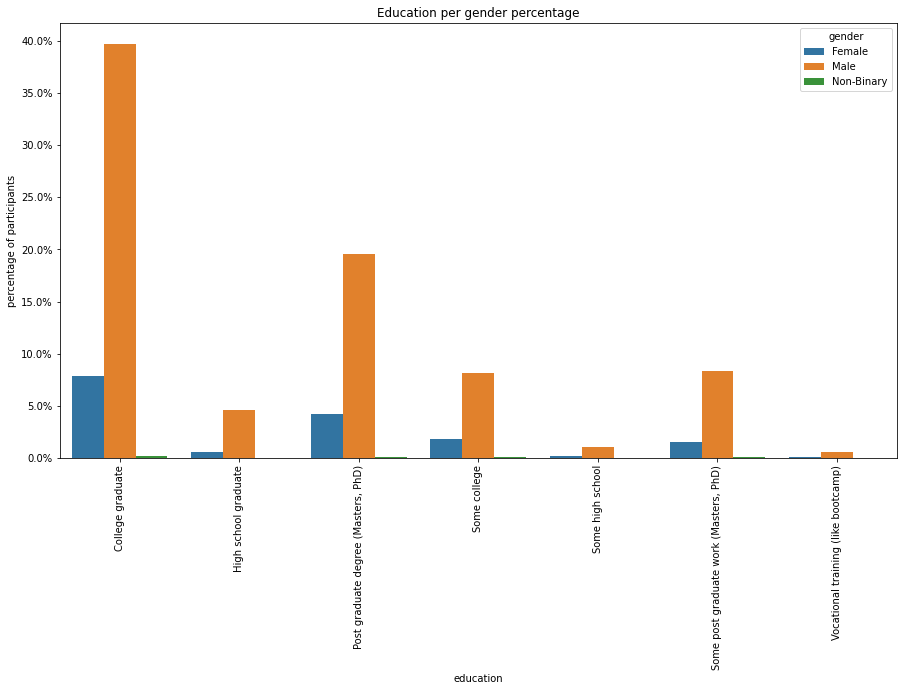

In [22]:
#https://www.kaggle.com/nulldata/hacker-women-in-tech-hackerrank-analysis reference code to make data acceptable
#make the graph more meaningful
plt.figure(figsize = (15,8))
ax = sns.barplot(x='education', y='educationValue', hue='gender', data= new_df)

#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

vals = ax.get_yticks()
ax.set(title='Education per gender percentage')
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
ax.set_ylabel('percentage of participants')
plt.xticks(rotation=90)

#job level

In [23]:
dic_jobLevel = {}
code_mapping(dic_jobLevel,'q8JobLevel')

{0: 'Other (please specify)',
 1: 'Student',
 2: 'New grad',
 3: 'Freelancer',
 4: 'Level 1 developer (junior)',
 5: 'Senior developer',
 6: 'Principal engineer',
 7: 'Architect',
 8: 'Engineering manager',
 9: 'Director / VP of\xa0Engineering',
 10: 'Founder / CEO / CTO',
 11: 'None'}

In [24]:
jobLevel_count = HR_values.groupby(['q8JobLevel','q3Gender'])['RespondentID'].count()
jobLevel_count

q8JobLevel                    q3Gender  
Architect                     #NULL!           3
                              Female          22
                              Male           491
                              Non-Binary       2
Director / VP of Engineering  #NULL!           1
                              Female           8
                              Male           128
                              Non-Binary       3
Engineering manager           #NULL!           1
                              Female          45
                              Male           381
                              Non-Binary       1
Founder / CEO / CTO           Female          25
                              Male           297
                              Non-Binary       1
Freelancer                    #NULL!           3
                              Female          33
                              Male           447
                              Non-Binary       3
Level 1 developer (junior)  

In [25]:
job_df = pd.DataFrame(index=range(len(jobLevel_count)),columns=['gender','jobs','jobValue'])
job_df = job_df.astype({'jobValue':float})
for i, n in enumerate(jobLevel_count):
  if jobLevel_count.index[i][1] != "#NULL!":
    job_df.loc[i,('gender')] = jobLevel_count.index[i][1]
  job_df.loc[i,('jobs')] = jobLevel_count.index[i][0]
  job_df.loc[i,('jobValue')] = n/jobLevel_count.sum()

job_df.head()

,gender,jobs,jobValue
0,NaN,Architect,0.000124
1,Female,Architect,0.000912
2,Male,Architect,0.020346
3,Non-Binary,Architect,0.000083
4,NaN,Director / VP of Engineering,0.000041


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

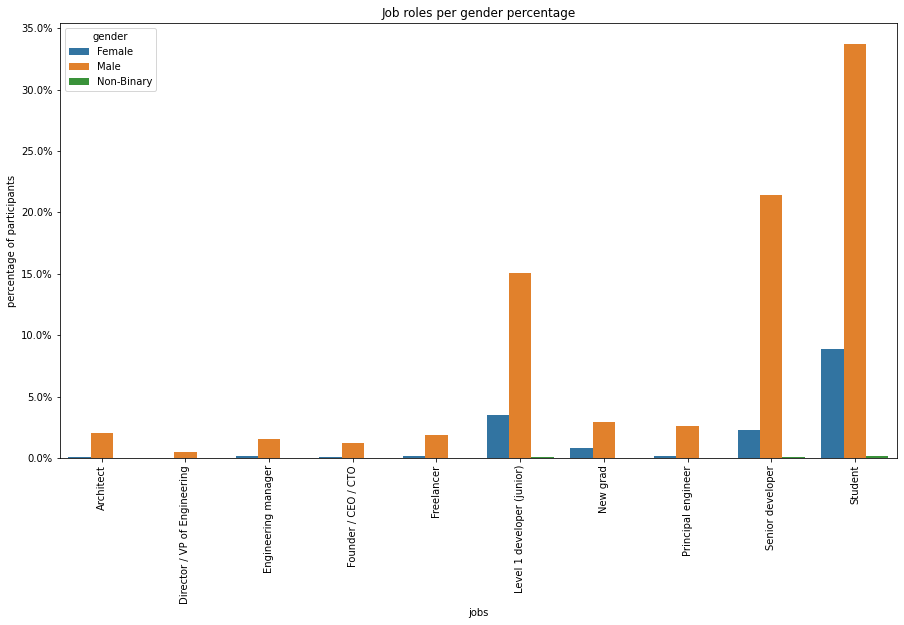

In [26]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x='jobs', y='jobValue', hue='gender', data= job_df)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


'''
  individual roles as role models
  CEO, senior developer, director of engineering


'''
vals = ax.get_yticks()
ax.set(title='Job roles per gender percentage')
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
ax.set_ylabel('percentage of participants')
plt.xticks(rotation=90)

#coding experience 

This is the time respondent started programming 

In [27]:
codeExp_count = HR_values.groupby(['q1AgeBeginCoding','q3Gender'])['RespondentID'].count()
codeExp_count

q1AgeBeginCoding    q3Gender  
#NULL!              #NULL!           14
                    Female            4
                    Male             12
11 - 15 years old   #NULL!            7
                    Female          569
                    Male           4651
                    Non-Binary       37
16 - 20 years old   #NULL!           36
                    Female         2657
                    Male          11543
                    Non-Binary       57
21 - 25 years old   #NULL!            8
                    Female          609
                    Male           2998
                    Non-Binary       11
26 - 30 years old   #NULL!            1
                    Female          130
                    Male            506
                    Non-Binary        5
31 - 35 years old   Female           48
                    Male            144
                    Non-Binary        1
36 - 40 years old   Female           19
                    Male             47
         

In [28]:
pd.isnull(HR_numeric['q3Gender']).sum()

0

In [29]:
codeExp_df = pd.DataFrame(index=range(len(codeExp_count)),columns=['gender','codeExpAge','codeExpValue'])
codeExp_df = codeExp_df.astype({'codeExpValue':float})
new_df
for i, n in enumerate(codeExp_count):
  if codeExp_count.index[i][1] != "#NULL!":
    codeExp_df.loc[i,('gender')] = codeExp_count.index[i][1]
  codeExp_df.loc[i,('codeExpAge')] = codeExp_count.index[i][0]
  codeExp_df.loc[i,('codeExpValue')] = n/codeExp_count.sum()

codeExp_df.head()

,gender,codeExpAge,codeExpValue
0,NaN,#NULL!,0.000558
1,Female,#NULL!,0.000159
2,Male,#NULL!,0.000478
3,NaN,11 - 15 years old,0.000279
4,Female,11 - 15 years old,0.022678


In [30]:
codeExp_df.codeExpValue.sum()


1.0

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

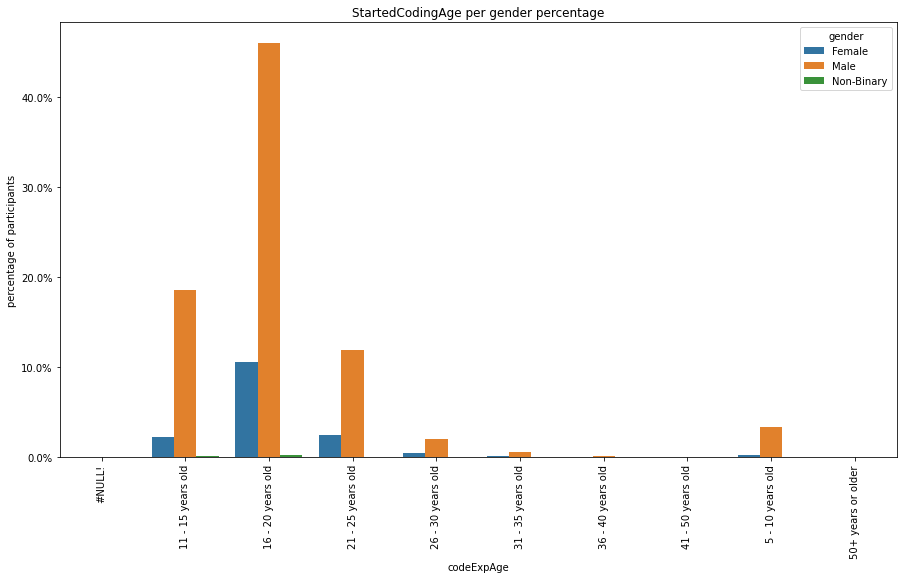

In [31]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x='codeExpAge', y='codeExpValue', hue='gender', data= codeExp_df)
vals = ax.get_yticks()
ax.set(title='StartedCodingAge per gender percentage')
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
ax.set_ylabel('percentage of participants')
plt.xticks(rotation=90)

#Intiative to learn code 

In [32]:
#q6LearnCodeSelfTaught
dic_learnCode = {}
code_mapping(dic_learnCode,'q6LearnCodeSelfTaught')

{1: 'Self-taught (i.e. books, online)'}

In [33]:
pd.isnull(HR_values['q6LearnCodeSelfTaught']).sum()

7490

In [34]:
selfTaught_count = HR_numeric.groupby(['q6LearnCodeSelfTaught','q3Gender'])['RespondentID'].count()
selfTaught_count

q6LearnCodeSelfTaught  q3Gender
0                      #NULL!         30
                       1            5449
                       2            1982
                       3              29
1                      #NULL!         39
                       1           15325
                       2            2140
                       3              96
Name: RespondentID, dtype: int64

In [35]:
selfTaught_df = pd.DataFrame(index=range(len(selfTaught_count)),columns=['gender','selfTaught','selfTaughtValue'])
selfTaught_df = selfTaught_df.astype({'selfTaughtValue':float})
new_df
for i, n in enumerate(selfTaught_count):
  if selfTaught_count.index[i][1] != "#NULL!":
    selfTaught_df.loc[i,('gender')] = dic_gender[int(selfTaught_count.index[i][1])]
  selfTaught_df.loc[i,('selfTaught')] = selfTaught_count.index[i][0]
  selfTaught_df.loc[i,('selfTaughtValue')] = n/selfTaught_count.sum()

selfTaught_df

,gender,selfTaught,selfTaughtValue
0,NaN,0,0.001196
1,Male,0,0.217178
2,Female,0,0.078996
3,Non-Binary,0,0.001156
4,NaN,1,0.001554
5,Male,1,0.610801
6,Female,1,0.085293
7,Non-Binary,1,0.003826


Text(0, 0.5, 'percentage of participants')

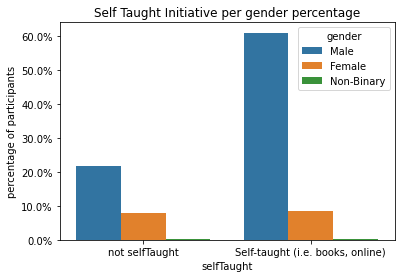

In [36]:
ax = sns.barplot(x='selfTaught', y='selfTaughtValue', hue='gender', data= selfTaught_df)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#ax =plt.xticks(rotation=90)
vals = ax.get_yticks()
xvals = ax.get_xticks()
ax.set(title='Self Taught Initiative per gender percentage')
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
ax.set_xticklabels([dic_learnCode[x] if x != 0 else "not selfTaught" for x in xvals])
#[dic_learnCode[x] if x != 0 else "not selfTaught" for x in xvals]
ax.set_ylabel('percentage of participants')
#plt.xticks(rotation=90)

#degree focused per gender 

In [37]:
degree_learnCode = {}
code_mapping(degree_learnCode,'q5DegreeFocus')

{0: 'Other (please specify)',
 1: 'Computer Science',
 2: 'Other STEM (science, technology, engineering, math)'}

In [38]:
#q5DegreeFocus
degree_count = HR_values.groupby(['q3Gender','q5DegreeFocus'])['RespondentID'].count()
degree_count

q3Gender    q5DegreeFocus                                      
#NULL!      #NULL!                                                    13
            Computer Science                                          35
            Other STEM (science, technology, engineering, math)       17
Female      #NULL!                                                    24
            Computer Science                                        2896
            Other STEM (science, technology, engineering, math)      962
Male        #NULL!                                                   122
            Computer Science                                       14964
            Other STEM (science, technology, engineering, math)     4787
Non-Binary  #NULL!                                                     3
            Computer Science                                          77
            Other STEM (science, technology, engineering, math)       31
Name: RespondentID, dtype: int64

In [39]:
degree_df = pd.DataFrame(index=range(len(degree_count)),columns=['gender','degree','degreeValue'])
degree_df = degree_df.astype({'degreeValue':float})

for i, n in enumerate(degree_count):
  if degree_count.index[i][0] != "#NULL!":
    degree_df.loc[i,('gender')] = degree_count.index[i][0]
  if degree_count.index[i][1] != "#NULL!":
    degree_df.loc[i,('degree')] = degree_count.index[i][1]
  degree_df.loc[i,('degreeValue')] = n/degree_count.sum()

degree_df.head()

,gender,degree,degreeValue
0,NaN,NaN,0.000543
1,NaN,Computer Science,0.001463
2,NaN,"Other STEM (science, technology, engineering, ...",0.000710
3,Female,NaN,0.001003
4,Female,Computer Science,0.121015


Text(0, 0.5, 'percentage of participants')

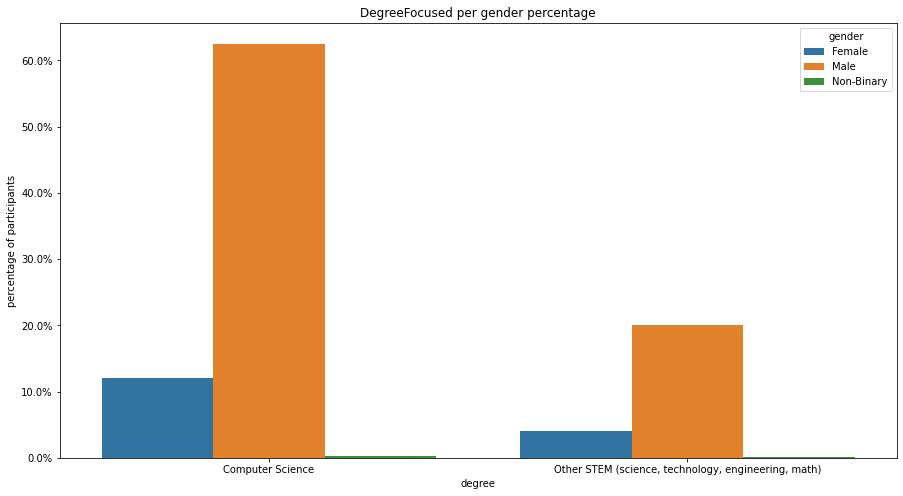

In [40]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x='degree', y='degreeValue', hue='gender', data= degree_df)

#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

vals = ax.get_yticks()
ax.set(title='DegreeFocused per gender percentage')
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
ax.set_ylabel('percentage of participants')
#plt.xticks(rotation=90)

#Education and Age

In [41]:
eduAge_count = HR_values.groupby(['q4Education','q1AgeBeginCoding','q3Gender']).count()
eduAge_count

RespondentID  ...  q36Level4
q4Education                         q1AgeBeginCoding  q3Gender                  ...           
#NULL!                              #NULL!            #NULL!                12  ...         12
                                                      Male                   1  ...          1
                                    11 - 15 years old Female                 8  ...          8
                                                      Male                  29  ...         29
                                                      Non-Binary             2  ...          2
...                                                                        ...  ...        ...
Vocational training (like bootcamp) 36 - 40 years old Male                   3  ...          3
                                    41 - 50 years old Male                   2  ...          2
                                    5 - 10 years old  Female                 1  ...          1
                                                      Male                  11  ...         11
                                                      Non-Binary             3  ...          3

[173 rows x 248 columns]

In [42]:
eduAge_count = HR_numeric.groupby(['q4Education','q1AgeBeginCoding','q3Gender'])['RespondentID'].count()
eduAge_count

q4Education  q1AgeBeginCoding  q3Gender
#NULL!       #NULL!            #NULL!      12
                               1            1
             1                 1            5
                               3            1
             2                 1           29
                                           ..
7            7                 1            9
                               2            9
             8                 1           10
                               2            5
             9                 2            1
Name: RespondentID, Length: 173, dtype: int64

In [43]:
dic_gender

{1: 'Male', 2: 'Female', 3: 'Non-Binary'}

In [44]:
eduAge_df = pd.DataFrame(index=range(len(eduAge_count)),columns=['education','Age','Gender'])
#eduAge_df = eduAge_df.astype({'eduAgeValue':float})

for i, n in enumerate(eduAge_count):
  if eduAge_count.index[i][1] != "#NULL!":
    eduAge_df.loc[i,('education')] = int(eduAge_count.index[i][1])
  if eduAge_count.index[i][0] != "#NULL!":
    eduAge_df.loc[i,('Age')] = int(eduAge_count.index[i][0])
  if (eduAge_count.index[i][2] != "#NULL!") and (eduAge_count.index[i][2] != "3"):
    #print(eduAge_count.index[i][2],type(eduAge_count.index[i][2]))
    eduAge_df.loc[i,('Gender')] = dic_gender[int(eduAge_count.index[i][2])]

#eduAge_df.head()

In [45]:
dic_age = {}
code_mapping(dic_age,'q1AgeBeginCoding')

{1: '5 - 10 years old',
 2: '11 - 15 years old',
 3: '16 - 20 years old',
 4: '21 - 25 years old',
 5: '26 - 30 years old',
 6: '31 - 35 years old',
 7: '36 - 40 years old',
 8: '41 - 50 years old',
 9: '50+ years or older'}

[Text(0.5, 1.0, 'Education Against Age per gender ')]

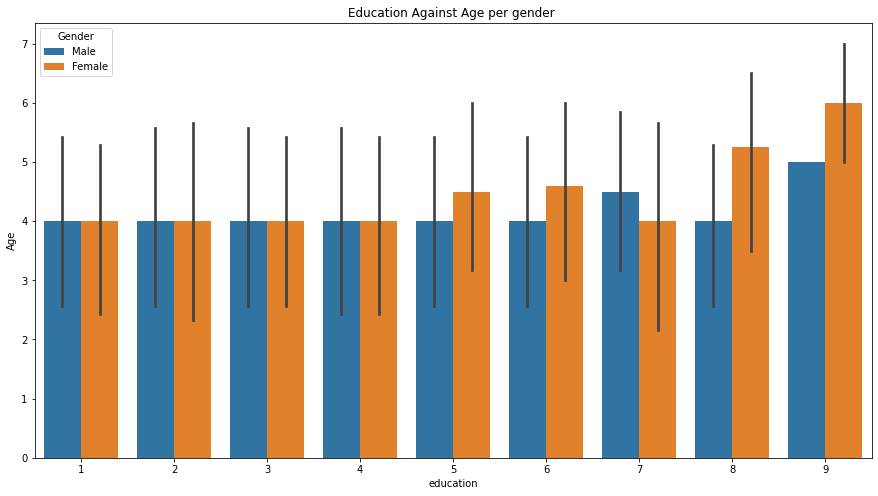

In [46]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x='education', y='Age',hue= 'Gender',data= eduAge_df)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#ax =plt.xticks(rotation=90)
#we can split theses into male and female
vals = ax.get_yticks()
ax.set(title='Education Against Age per gender ')

#plt.xticks(rotation=90)

[Text(0.5, 1.0, 'Education Against Age ')]

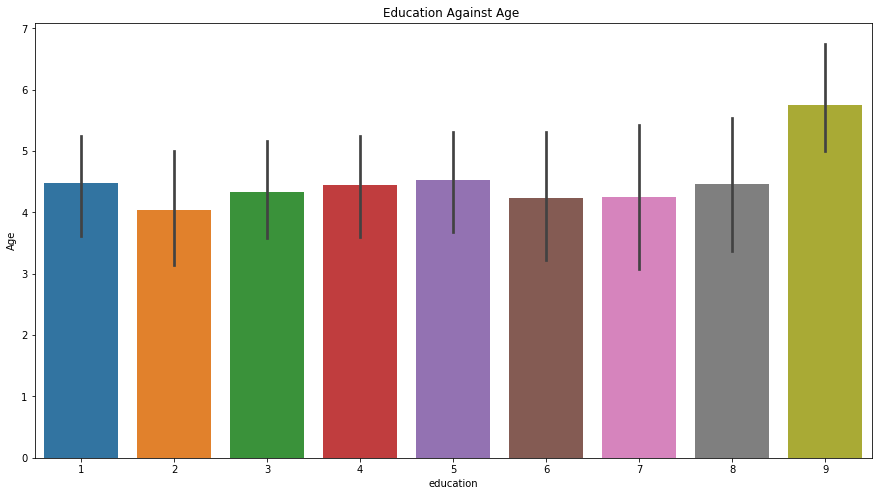

In [47]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x='education', y='Age',data= eduAge_df)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#ax =plt.xticks(rotation=90)
#we can split theses into male and female
vals = ax.get_yticks()
ax.set(title='Education Against Age ')

#plt.xticks(rotation=90)

#countries performance on women in tech 

In [48]:
!git clone 'https://gist.github.com/876a09e364140c9fa67f8667ea10b4d8.git'

fatal: destination path '876a09e364140c9fa67f8667ea10b4d8' already exists and is not an empty directory.


In [49]:
#/content/gdrive/MyDrive/876a09e364140c9fa67f8667ea10b4d8/countryinfo.py

